In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [77]:
print('Первые 5 строк:')
print(df.head(5))

Первые 5 строк:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80  

In [78]:
print('Последние 5 строк:')
print(df.tail(5))

Последние 5 строк:
     Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    S

In [79]:
print('Структура данных:')
print(df.info())

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None

In [80]:
print('Типы данных:')
print(df.dtypes)

Типы данных:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


B. Обработка данных:

In [81]:
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [82]:
df = df.fillna("Absent")
print(df.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [83]:
print('Количество дубликатов:')
print(df.duplicated().sum())

Количество дубликатов:
0


In [84]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
from scipy import stats
z = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outlier_indices = np.where(z > threshold)
print(outlier_indices)

(array([  3,   4,   5,  93, 145, 264, 266, 276, 277]), array([6, 6, 6, 6, 6, 6, 6, 6, 6]))


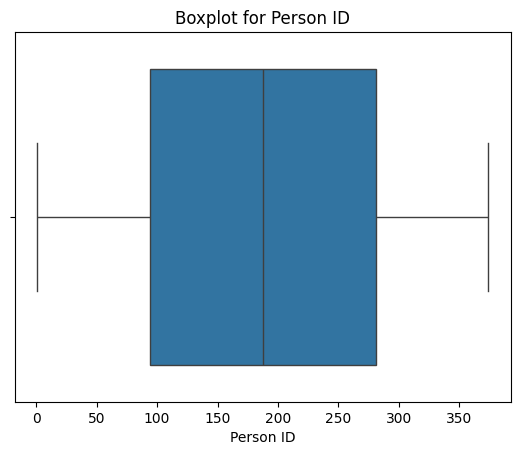

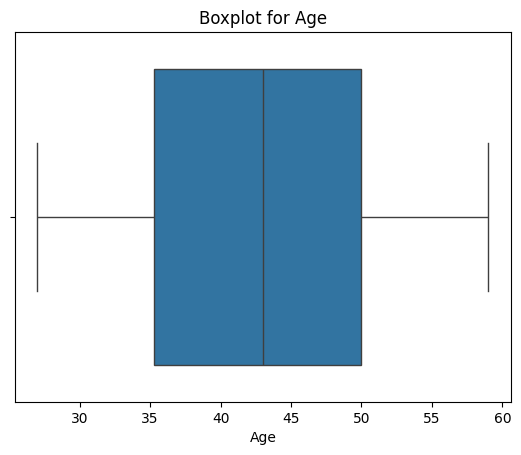

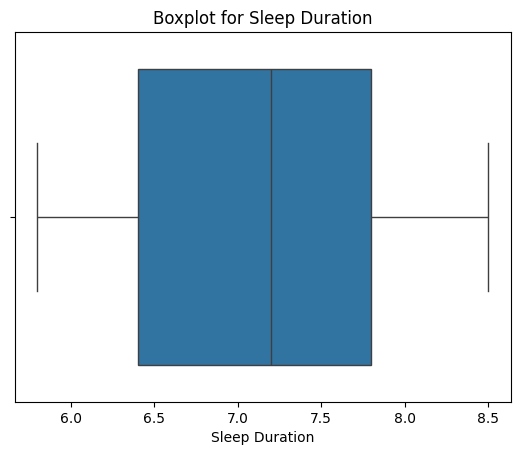

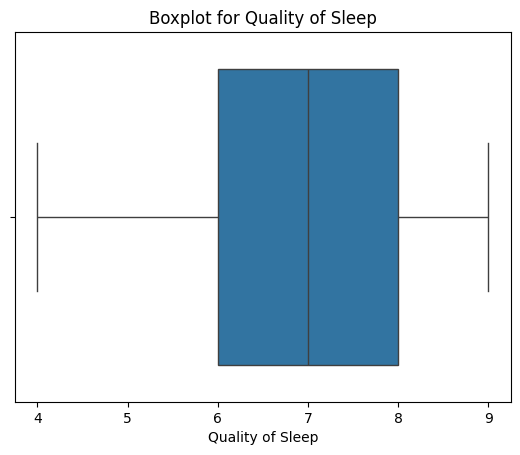

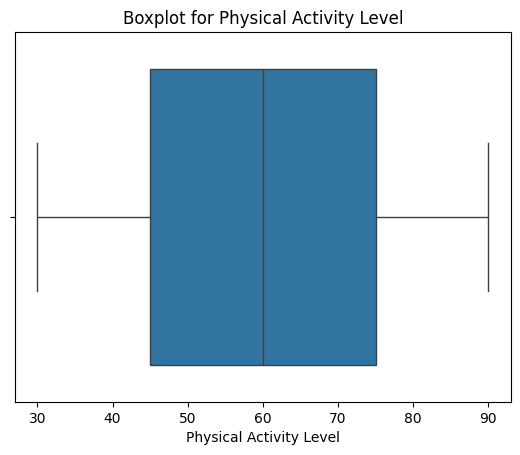

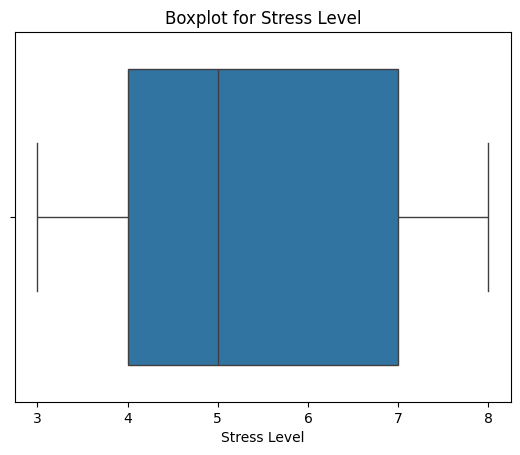

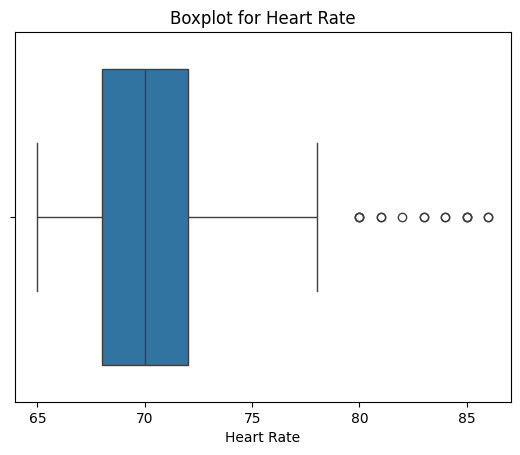

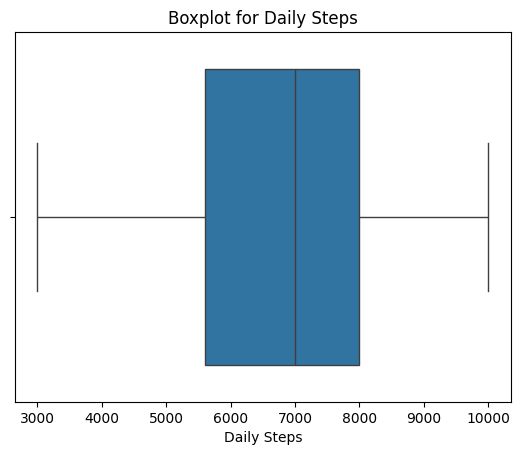

In [85]:
#boxplot для всех числовых столбцов
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [86]:
print('Описательная статистика')
print(df.describe())

Описательная статистика
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%    

In [87]:
print('Подсчёт частоты:')
for col in df:
  print(df[col].value_counts(normalize=True))


Подсчёт частоты:
Person ID
374    0.002674
1      0.002674
2      0.002674
3      0.002674
4      0.002674
         ...   
11     0.002674
10     0.002674
9      0.002674
8      0.002674
7      0.002674
Name: proportion, Length: 374, dtype: float64
Gender
Male      0.505348
Female    0.494652
Name: proportion, dtype: float64
Age
43    0.090909
44    0.080214
37    0.053476
38    0.053476
50    0.053476
31    0.048128
32    0.045455
53    0.045455
59    0.042781
39    0.040107
45    0.037433
33    0.034759
29    0.034759
30    0.034759
36    0.032086
35    0.032086
41    0.032086
49    0.029412
42    0.024064
57    0.024064
52    0.024064
51    0.021390
54    0.018717
58    0.016043
28    0.013369
40    0.010695
48    0.008021
55    0.005348
34    0.005348
56    0.005348
27    0.002674
Name: proportion, dtype: float64
Occupation
Nurse                   0.195187
Doctor                  0.189840
Engineer                0.168449
Lawyer                  0.125668
Teacher                 0.10

In [88]:
print('Подсчёт уникальных значений:')
print(df.nunique())

Подсчёт уникальных значений:
Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


In [89]:
print('Корреляционный анализ:')
print(df.corr(numeric_only=True))

Корреляционный анализ:
                         Person ID       Age  Sleep Duration  \
Person ID                 1.000000  0.990516        0.296305   
Age                       0.990516  1.000000        0.344709   
Sleep Duration            0.296305  0.344709        1.000000   
Quality of Sleep          0.431612  0.473734        0.883213   
Physical Activity Level   0.149882  0.178993        0.212360   
Stress Level             -0.394287 -0.422344       -0.811023   
Heart Rate               -0.225467 -0.225606       -0.516455   
Daily Steps               0.043844  0.057973       -0.039533   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896         

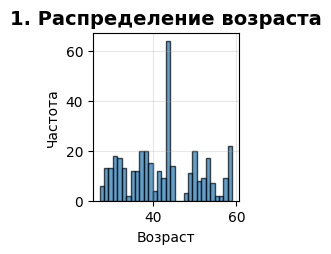

In [90]:
ax1 = plt.subplot(2, 3, 1)
if 'Age' in df.columns:
    df['Age'].hist(bins=30, edgecolor='black', alpha=0.7)
    ax1.set_title('1. Распределение возраста', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Возраст')
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)


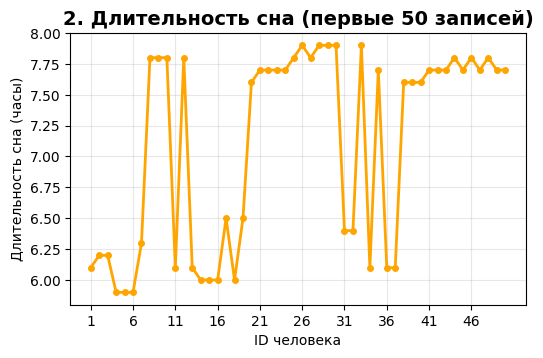

In [91]:
# 3. Линейный график (если есть временные данные или последовательные измерения)
plt.figure(figsize=(20, 12))
ax3 = plt.subplot(3, 3, 3)
if 'Person ID' in df.columns and 'Sleep Duration' in df.columns:
    # Сортируем по ID для последовательности
    temp_df = df.sort_values('Person ID').head(50)
    ax3.plot(temp_df['Person ID'], temp_df['Sleep Duration'],
             marker='o', linewidth=2, markersize=4, color='orange')
    ax3.set_title('2. Длительность сна (первые 50 записей)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('ID человека')
    ax3.set_ylabel('Длительность сна (часы)')
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(temp_df['Person ID'][::5])

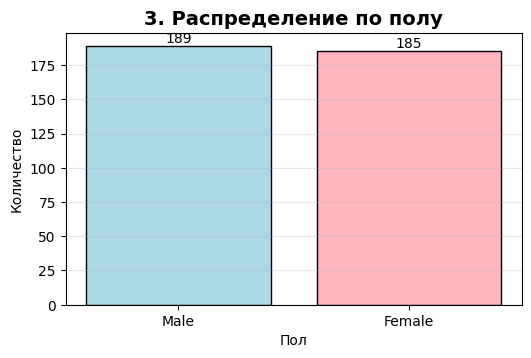

In [92]:
plt.figure(figsize=(20, 12))
ax4 = plt.subplot(3, 3, 4)
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    bars = ax4.bar(gender_counts.index, gender_counts.values,
                   color=['lightblue', 'lightpink'], edgecolor='black')
    ax4.set_title('3. Распределение по полу', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Пол')
    ax4.set_ylabel('Количество')
    ax4.grid(True, alpha=0.3, axis='y')
    for bar in bars:
      height = bar.get_height()
      ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
              f'{int(height)}', ha='center', va='bottom')

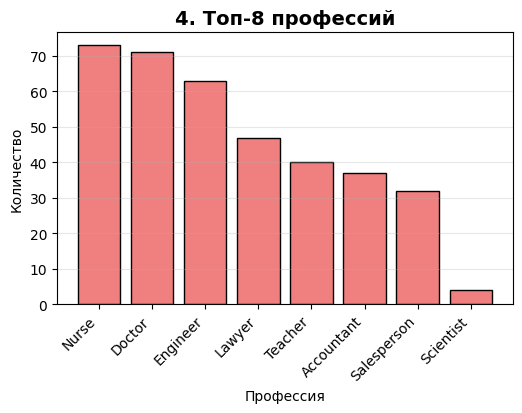

In [93]:
plt.figure(figsize=(20, 12))
ax5 = plt.subplot(3, 3, 5)
if 'Occupation' in df.columns:
    occupation_counts = df['Occupation'].value_counts().head(8)
    bars = ax5.bar(range(len(occupation_counts)), occupation_counts.values,
                   color='lightcoral', edgecolor='black')
    ax5.set_title('4. Топ-8 профессий', fontsize=14, fontweight='bold')
    ax5.set_xlabel('Профессия')
    ax5.set_ylabel('Количество')
    ax5.set_xticks(range(len(occupation_counts)))
    ax5.set_xticklabels(occupation_counts.index, rotation=45, ha='right')
    ax5.grid(True, alpha=0.3, axis='y')

/tmp/ipython-input-2142071271.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(boxplot_data, labels=numerical_cols[:4], patch_artist=True)


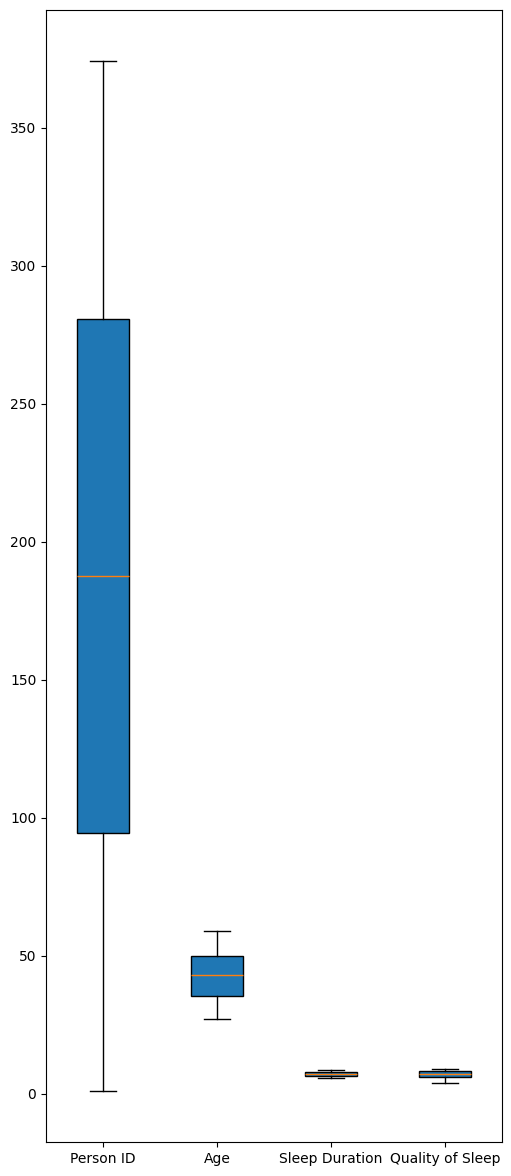

In [94]:
plt.figure(figsize=(20, 50))
ax6 = plt.subplot(3, 3, 6)
if len(numerical_cols) > 0:
    boxplot_data = [df[col] for col in numerical_cols[:4]]  # Первые 4 числовые колонки
    bp = ax6.boxplot(boxplot_data, labels=numerical_cols[:4], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']



In [95]:
# 1. Группировка по полу
print('\n1. ГРУППИРОВКА ПО ПОЛУ:')
if 'Gender' in df.columns:
    gender_stats = df.groupby('Gender').agg({
        'Age': ['mean', 'median', 'std', 'count'],
        'Sleep Duration': 'mean',
        'Quality of Sleep': 'mean',
        'Stress Level': 'mean'
    }).round(2)
    print(gender_stats)


1. ГРУППИРОВКА ПО ПОЛУ:
          Age                    Sleep Duration Quality of Sleep Stress Level
         mean median   std count           mean             mean         mean
Gender                                                                       
Female  47.41   50.0  8.09   185           7.23             7.66         4.68
Male    37.07   38.0  5.66   189           7.04             6.97         6.08


In [96]:
print('\n2. ГРУППИРОВКА ПО КАТЕГОРИИ ИМТ:')
if 'BMI Category' in df.columns:
    bmi_stats = df.groupby('BMI Category').agg({
        'Age': 'mean',
        'Sleep Duration': ['mean', 'min', 'max'],
        'Quality of Sleep': 'mean',
        'Stress Level': 'mean',
        'Person ID': 'count'
    }).round(2)
    print(bmi_stats)


2. ГРУППИРОВКА ПО КАТЕГОРИИ ИМТ:
                 Age Sleep Duration           Quality of Sleep Stress Level  \
                mean           mean  min  max             mean         mean   
BMI Category                                                                  
Normal         38.48           7.39  6.0  8.5             7.66         5.13   
Normal Weight  38.38           7.33  6.4  8.2             7.43         5.19   
Obese          38.00           6.96  5.9  8.1             6.40         5.70   
Overweight     47.89           6.77  5.8  8.2             6.90         5.73   

              Person ID  
                  count  
BMI Category             
Normal              195  
Normal Weight        21  
Obese                10  
Overweight          148  


In [97]:
print('\n3. ГРУППИРОВКА ПО ПРОФЕССИИ:')
if 'Occupation' in df.columns:
    # Простая группировка - сначала используем базовый вариант
    occupation_stats_simple = df.groupby('Occupation').agg({
        'Age': 'mean',
        'Sleep Duration': 'mean',
        'Quality of Sleep': 'mean',
        'Stress Level': 'mean',
        'Daily Steps': 'mean',
        'Person ID': 'count'
    }).round(2)
    occupation_stats_simple = occupation_stats_simple.rename(columns={
        'Age': 'Средний возраст',
        'Sleep Duration': 'Средняя длит. сна',
        'Quality of Sleep': 'Среднее кач. сна',
        'Stress Level': 'Средний уровень стресса',
        'Daily Steps': 'Среднее шагов в день',
        'Person ID': 'Количество'
    })
    occupation_stats_simple = occupation_stats_simple.sort_values('Количество', ascending=False)

    print('Статистика по профессиям (сортировка по количеству людей):')
    print(occupation_stats_simple)





3. ГРУППИРОВКА ПО ПРОФЕССИИ:
Статистика по профессиям (сортировка по количеству людей):
                      Средний возраст  Средняя длит. сна  Среднее кач. сна  \
Occupation                                                                   
Nurse                           51.79               7.06              7.37   
Doctor                          32.68               6.97              6.65   
Engineer                        46.59               7.99              8.41   
Lawyer                          39.43               7.41              7.89   
Teacher                         41.72               6.69              6.98   
Accountant                      39.62               7.11              7.89   
Salesperson                     43.53               6.40              6.00   
Scientist                       33.50               6.00              5.00   
Software Engineer               31.25               6.75              6.50   
Sales Representative            28.00               5

In [98]:
print('\n4. СВОДНАЯ ТАБЛИЦА (PIVOT TABLE):')
if all(col in df.columns for col in ['Gender', 'BMI Category', 'Sleep Duration', 'Quality of Sleep']):
    pivot_table = pd.pivot_table(
        df,
        values=['Sleep Duration', 'Quality of Sleep', 'Stress Level'],
        index=['BMI Category'],
        columns=['Gender'],
        aggfunc={'Sleep Duration': 'mean', 'Quality of Sleep': 'mean', 'Stress Level': 'mean'},
        margins=True
    ).round(2)
    print(pivot_table)


4. СВОДНАЯ ТАБЛИЦА (PIVOT TABLE):
              Quality of Sleep             Sleep Duration              \
Gender                  Female  Male   All         Female  Male   All   
BMI Category                                                            
Normal                    8.50  7.25  7.66           7.79  7.20  7.39   
Normal Weight             7.29  7.71  7.43           7.29  7.43  7.33   
Obese                     7.00  6.33  6.40           7.40  6.91  6.96   
Overweight                7.22  6.10  6.90           6.88  6.49  6.77   
All                       7.66  6.97  7.31           7.23  7.04  7.13   

              Stress Level              
Gender              Female  Male   All  
BMI Category                            
Normal                3.50  5.92  5.13  
Normal Weight         5.14  5.29  5.19  
Obese                 5.00  5.78  5.70  
Overweight            5.32  6.76  5.73  
All                   4.68  6.08  5.39  
